# Statistical and Power Analysis for the Detection of Transcription Errors

## Introduction

- In the simplest scenario, we are comparing two samples, and we wish to decide whether they differ (at a statistically significant level) in the error rate of transcription errors. In each sample, we observe some amount of bases, for which we decide whether or not we consider them to be an error.  
- We may organize our observations in a contingency table as follows:

|   | Sample 1 | Sample 2 |
| ------------- | ------------- | ---|
| **Error bases**  | num_error_1  | num_error_2| 
| **Correct bases**  | num_correct_1  | num_correct_2|

- The data we observed were generated as follows: we sampled *num_observations_1* and *num_observation_2* from samples 1 and 2, and they were distributed between correct and error bases at random, according to error rates *error_rate_1* and *error_rate_2*.
- The error rates consist of two factors: transcription error rates (*tr_error_rate_1* and *tr_error_rate_2*) and *noise_error_rate*. We assume that *tr_error_rate_1* and *tr_error_rate_2* may differ between samples, but the *noise_error_rate* is the same for both samples. We therefore have: 
    - *error_rate_1 = tr_error_rate_1 + noise_error_rate*,
    - *error_rate_2 = tr_error_rate_2 + noise_error_rate* 
    
   Where we omitted the possibility of both transcription error and error from noise occurring at the same time, as the probability of this event is negligibly low.
- The transcription error rates in eukaryotic organisms are of the order $5 \times 10^{-6}$, and the interventions / conditions like aging can increase them $1.5 - 2$ times to $7.5 - 10 \times 10^{-6}$. (see reading notes)
- The *noise_error_rate* is influenced mostly by the error rate of reverse transcription, which is of the order $3-10 \times 10^{-5}$.
- Therefore, the error rates that we are observing will be dominated by the noise errors, and even relatively large increase (e.g. by 50%, from $5 \times 10^{-6}$ to $7.5 \times 10^{-6}$) would require large amount of observation to be detected on statistically significant level. Following plot illustrate this problem - with e.g., 10 millions observed bases in each of the sample, we don't have a much chance to observe statistically significant difference. We would therefore need to observe more bases (say, 100 millions):

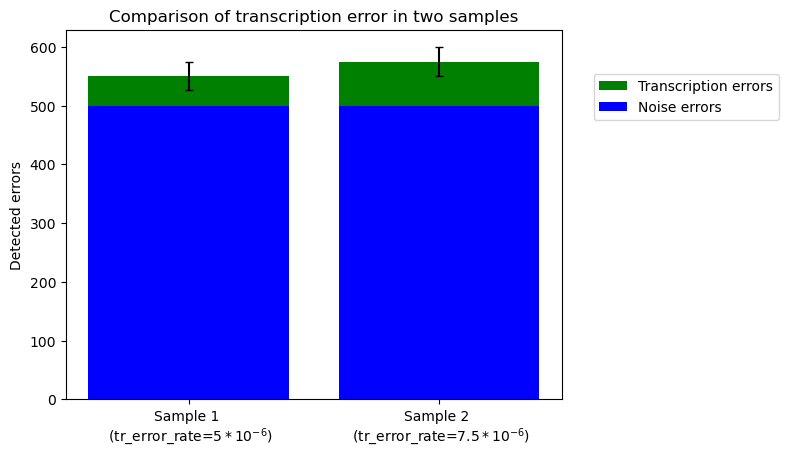

In [1]:
import matplotlib.pyplot as plt
import numpy as np

num_observations = 1*1e7
noise_error_rate = 5*1e-5
tr_error_rate_1 = 5*1e-6
tr_error_rate_2 = 7.5*1e-6

std_1 = np.sqrt(num_observations*(tr_error_rate_1 + noise_error_rate)*(1-tr_error_rate_1 + noise_error_rate))
std_2 = np.sqrt(num_observations*(tr_error_rate_2 + noise_error_rate)*(1-tr_error_rate_2 + noise_error_rate))

sample_1_name = 'Sample 1 \n (tr_error_rate=$5 * 10^{-6})$'
sample_2_name = 'Sample 2 \n (tr_error_rate=$7.5 * 10^{-6})$'

plt.bar(sample_1_name, num_observations * (tr_error_rate_1 + noise_error_rate),
        color='green',capsize=3, label='Transcription errors', yerr=std_1)
plt.bar(sample_1_name, num_observations * (noise_error_rate), color='blue', label='Noise errors') 

plt.bar(sample_2_name, num_observations * (tr_error_rate_2 + noise_error_rate),
        color='green',capsize=3, yerr=std_2)
plt.bar(sample_2_name, num_observations * (noise_error_rate), color='blue') 

plt.ylabel('Detected errors')
plt.title('Comparison of transcription error in two samples')
ax = plt.gca()
plt.legend(bbox_to_anchor=(1.05, 0.9), bbox_transform=ax.transAxes)
plt.show()

## Power Analysis
As the detected 